In [143]:
import numpy as np
import pandas as pd
import os
import pickle
import math
import pdb
from matplotlib import pyplot as plt
import importlib
import seaborn as sns

from cartopy import crs as ccrs
from cartopy import feature as cfeature
from matplotlib import cm
import cartopy.io.shapereader as shpreader

import loaders
import geography
import visualization

importlib.reload(loaders)
importlib.reload(geography)
importlib.reload(visualization)
import visualization as vis

%matplotlib

Using matplotlib backend: Qt5Agg


In [144]:
process = lambda x: x.replace('the','').replace('of','').replace(' ','').replace('-','').lower()

def get_fsi(record, df):
    name_long = process(record.attributes['NAME_LONG'])
    name_short = process(record.attributes['NAME'])
    if name_long in df.index:
        fsi = df.loc[name_long]['fragileIndexScore']
        name = record.attributes['NAME_LONG']
    elif name_short in df.index:
        fsi = df.loc[name_short]['fragileIndexScore']
        name = record.attributes['NAME_LONG']
    else:
        fsi = None
        name = None
    return name, fsi
    
    
fn = './data/FSI2020.csv'
df = pd.read_csv(fn)


USA
United States of America
CAN
Canada
RUS
Russia
GBR
United Kingdom
ISL
Iceland
FRA
France
ITA
Italy
CHN
China
AUT
Austria


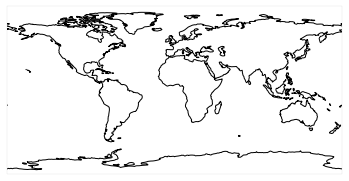

In [155]:
def area(ax, iso):
    print(iso)
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records():
       
        if n.attributes['ADM0_A3'] == iso: 
            name, fsi = get_fsi(n, df)
            if fsi is None:
                print(n.attributes['NAME'])
                continue
            if fsi < 25:
                clr = 'red'
            elif fsi >= 25 and fsi < 50:
                clr = 'blue'
            elif fsi >= 50 and fsi < 75:
                clr = 'purple'
            else:
                clr = 'green'
            try:
                ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                                  alpha = 0.5, linewidth =0.15, edgecolor = "black",
                                  label=n.attributes['ADM0_A3'])
            except:
                ax.add_geometries([n.geometry], ccrs.PlateCarree(), facecolor=clr, 
                                alpha = 0.5, linewidth =0.15, edgecolor = "black",
                                label=n.attributes['ADM0_A3'])
                
    return ax

iso3 = ['USA','CAN','RUS','GBR','ISL','FRA','ITA','CHN','AUT']

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

for n in iso3 :
    area(ax, n)
    
plt.show()